In [208]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

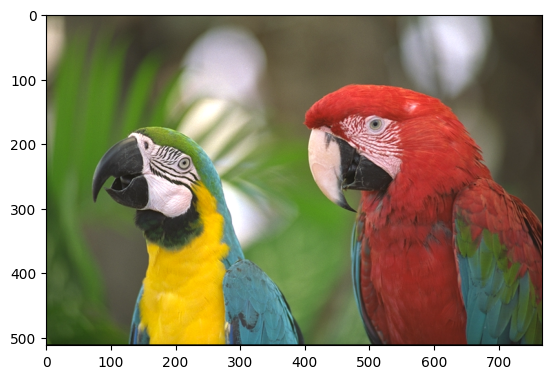

In [209]:
#Kies een afbeelding (die je zelf hebt gemaakt, Afbeelding A) en pas daar image 
#segmentation op toe. 
image_A = cv.imread('img/kodim23.png')
image_A = cv.cvtColor(image_A, cv.COLOR_BGR2RGB)
plt.imshow(image_A)
plt.show()

In [210]:
k = 6
pixelVals = image_A.reshape((-1, 3))
pixelVals = np.float32(pixelVals)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
retval, labels, centers = cv.kmeans(pixelVals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()

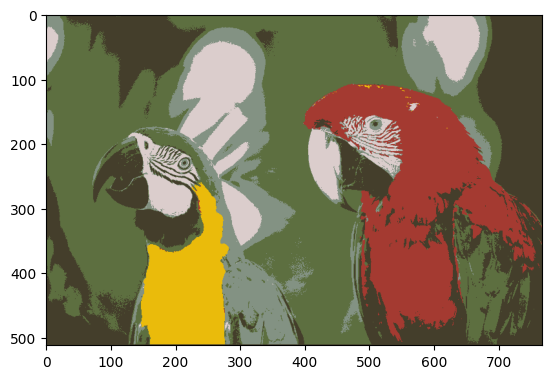

In [211]:
segment_image_A = centers[labels.flatten()]
segment_image_A = segment_image_A.reshape(image_A.shape)
plt.imshow(segment_image_A)
plt.show()

In [212]:
#Kies uit de gesegmenteerde afbeelding een segment (bepaalde kleur) en maak daar 
#en mask van (Mask A)

In [213]:
segment_image_A.shape

(512, 768, 3)

In [214]:
# select colors
red = segment_image_A[:,:,0]    
green = segment_image_A[:,:,1]
blue = segment_image_A[:,:,2]

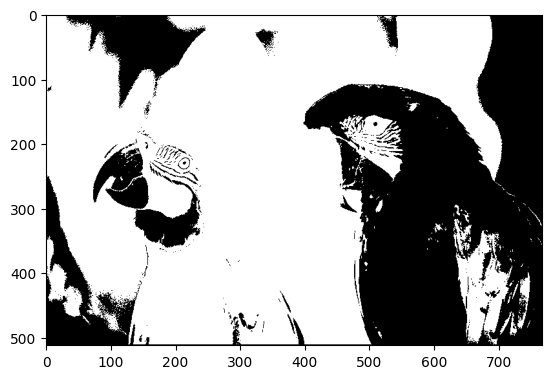

In [215]:
#create mask of segmented image using green color
mask_A = np.zeros(segment_image_A.shape[:2], np.uint8)
mask_A[green > 100] = 255
plt.imshow(mask_A, cmap='gray')
plt.show()

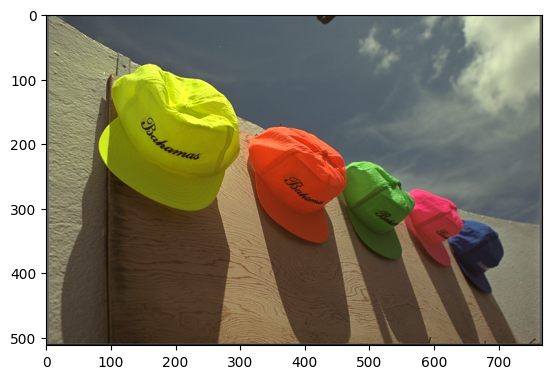

In [216]:
# mask new image with mask_A

#load new image
image_B = cv.imread('img/kodim03.png')
image_B = cv.cvtColor(image_B, cv.COLOR_BGR2RGB)

plt.imshow(image_B)
plt.show()

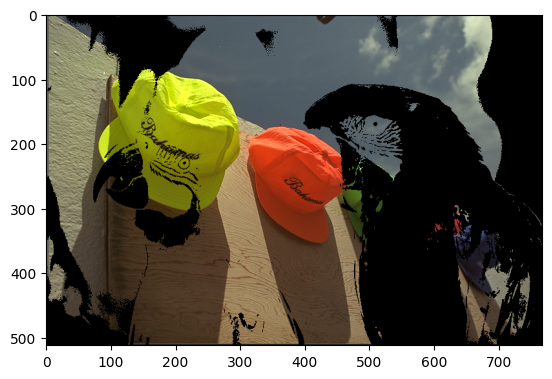

In [217]:
#put mask on new image
masked_image_B = cv.bitwise_and(image_B, image_B, mask=mask_A)
plt.imshow(masked_image_B)
plt.show()

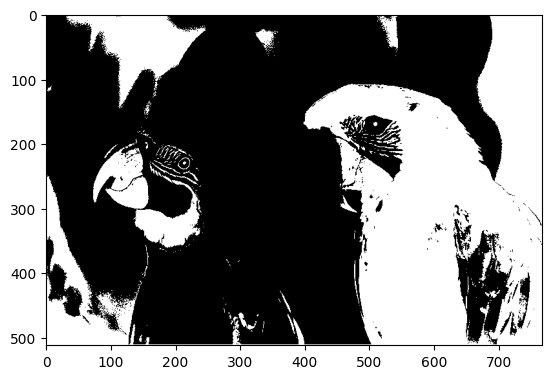

In [218]:
# Neem het complement (inverse) van het eerder gemaakte mask (mask A). Dit is je 
# tweede mask (Mask B)
mask_B = cv.bitwise_not(mask_A)
plt.imshow(mask_B, cmap='gray')
plt.show()


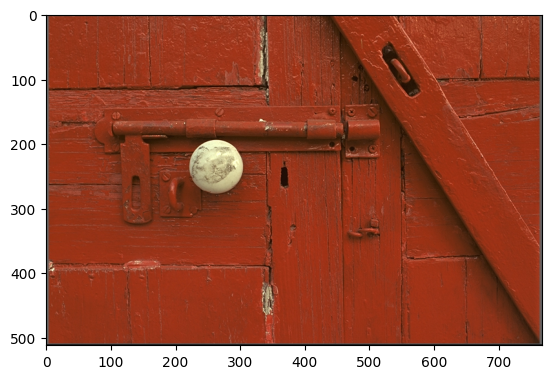

In [219]:
# Maskeer met dit tweede mask (mask B) een nieuwe afbeelding (afbeelding C)
image_C = cv.imread('img/kodim02.png')
image_C = cv.cvtColor(image_C, cv.COLOR_BGR2RGB)
plt.imshow(image_C)
plt.show()

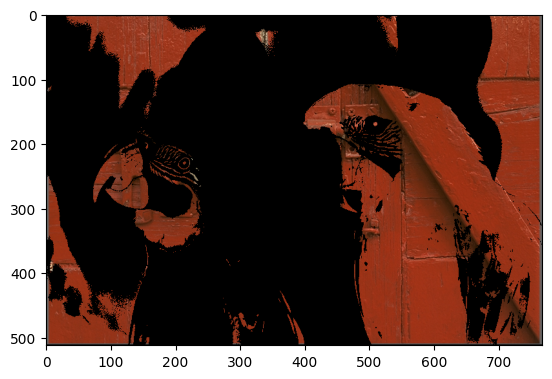

In [220]:
# mask image C with mask B
masked_image_C = cv.bitwise_and(image_C, image_C, mask=mask_B)
plt.imshow(masked_image_C)
plt.show()

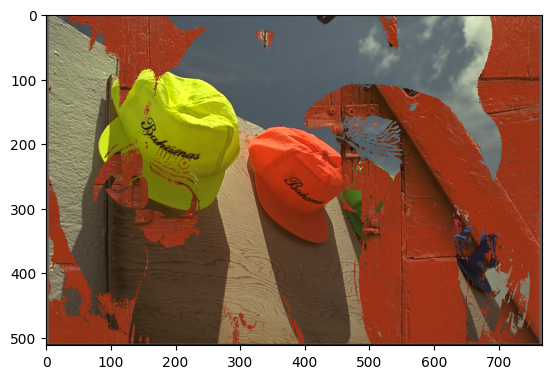

In [221]:
# Voeg nu de gemaskeerde afbeeldingen B en C samen tot het eind resultaat
# merge masked images
merged_image = cv.bitwise_or(masked_image_B, masked_image_C)
plt.imshow(merged_image)
plt.show()
